<a href="https://colab.research.google.com/github/souzamuniz/Drought_Analysis/blob/main/Extraindo_shp_lat_long_de_um_tiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NESTA ETAPA EXTRAÍMOS A LATITUDE E A LONGITUDE DOS PONTOS A SEREM ANALIZADOS

In [11]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 8.9 MB/s 
     |████████████████████████████████| 7.8 MB 46.1 MB/s 
     |████████████████████████████████| 16.6 MB 44.1 MB/s 


In [18]:
from osgeo import gdal
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [13]:
tiff_importado = gdal.Open("landsat.tif")
produto = 'landsat'

In [23]:
# # importar a imagem que quer usar de referencia para retirar as latitudes
# ds = gdal.Open("chirps_geom_test_1_1_2021.tif")
ds = tiff_importado
# Escolhe a banda que quer utilizar
ar = ds.GetRasterBand(1).ReadAsArray()
# Verifica o shape do raster
ar.shape
# Transforma em um vetor coluna
flat = ar.flatten()
#Extrai as informações cruciais para desenvolvimento do código
gt = ds.GetGeoTransform()
# Pega a resolução por meio da filtragem do comando de cima
# res = gt[1]
res = 0.25
# Acha o valor da coordenada X mínima
xmin = gt[0]
# Acha o valor da coordenada Y máxima
ymax = gt[3]
# Perceba que com o xmin e o ymax, temos o corner superior do raster

# Pegamos a informação do tamanho total na direção X
xsize = ds.RasterXSize
# Pegamos a informação do tamanho total na direção Y
ysize = ds.RasterYSize
# Queremos o centróide do gride, assim, pegamos o valor do meio para x e y:
xstart = xmin +res/2
ystart = ymax - res/2

# Desativamos o ds
ds = None

# Agora criaremosum array com os valores do raster
x = np.arange(xstart, (xstart+xsize*res), res)  # xstart+xsize*res é a quantidade de vezes que vai ser repetido
y = np.arange(ystart, (ystart-ysize*res), -res)
# x = np.delete(x,-1) # GABMBIARRA (quando nao for quadrado a imagem exportada)neste caso, nao pegamos uma imagem com o corte certo , possivelmnte temos um grid cortado não simétrico
# y = np.delete(y,-1) # GAMBIARRA(nao era quadrado) neste caso, nao pegamos uma imagem com o corte certo , possivelmnte temos um grid cortado não simétrico
x = np.tile(x, ysize)
y = np.repeat(y, xsize)

dfn = pd.DataFrame({"x":x, "y":y, "value":flat})

# ######## COMANDOS DE VERIFICAÇÃO:
              # print(len(y))
              # print(len(x))
              # ar.shape
              # print(len(yt))
              # print(len(xt))
              # yt = np.repeat(y, xsize)
              # len(yt)

In [24]:
dfn.iloc[:,0:2]

,x,y
0,-115.288467,36.420884
1,-115.038467,36.420884
2,-114.788467,36.420884
3,-114.538467,36.420884
4,-114.288467,36.420884
...,...,...
1385267,309.961533,-166.329116
1385268,310.211533,-166.329116
1385269,310.461533,-166.329116
1385270,310.711533,-166.329116


In [25]:
name ='coordenadas_' + 'do_'+produto+'.csv'
print(name)
print(name)
df_coord = dfn.iloc[:,0:2]
df_coord.to_csv(name) 

coordenadas_do_landsat.csv
coordenadas_do_landsat.csv


Plote Estilo o de Thiago ( fica tudo azul, pois, são muitos pontos )

In [73]:
# crs={'init':'epsg:4326'}

# geometry=[Point(xy) for xy in zip(df_coord["x"], df_coord["y"])]
# geodata=gpd.GeoDataFrame(df_coord,crs=crs, geometry=geometry)

In [ ]:
geometry

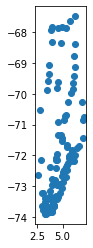

In [72]:
# # Plot:
# fig, ax = plt.subplots()
# geodata.plot(ax=ax)

TRANSFORMANDO DE CSV PARA SHP

In [52]:
# # Caso precise ler o csv de fora
xy_table = pd.read_csv('stations_IDEAM_sept_1_2016.csv')
# xy_table = dfn.iloc[:,0:2]

In [56]:
xy_table.rename(columns={'LATITUD': 'Lat', 'LONGITUD': 'Long'}, inplace = True)
xy_table

In [58]:
# xy_table.rename(columns={'x': 'Lat', 'y': 'Long'}, inplace = True)

In [59]:
# Criando uma coluna com as coordenadas
xy_table['coordinates'] = xy_table[['Lat', 'Long']].values.tolist()
xy_table.head()

,COD_CATALO,CATEGORIA,Lat,Long,ALTITUD,FECHA_INST,coordinates
0,31090010,PM,3.957639,-67.835333,92,6/15/1983,"[3.957639, -67.835333]"
1,31095010,CP,3.867667,-67.931694,100,11/15/1972,"[3.867667, -67.931694]"
2,32060030,PM,3.790722,-73.842778,600,1/15/1969,"[3.790722, -73.842778]"
3,32060060,PM,3.742333,-73.834694,800,7/15/1978,"[3.742333, -73.834694]"
4,32070010,PM,3.200000,-73.750000,260,9/15/1979,"[3.2, -73.75]"


In [60]:
# Modificando o tipo dos dados da 3ª coluna para o formato de ponto por meio da biblioteca "from shapely.geometry import Point"
from shapely.geometry import Point
xy_table['coordinates'] = xy_table['coordinates'].apply(Point)
xy_table.head()

,COD_CATALO,CATEGORIA,Lat,Long,ALTITUD,FECHA_INST,coordinates
0,31090010,PM,3.957639,-67.835333,92,6/15/1983,POINT (3.957639 -67.835333)
1,31095010,CP,3.867667,-67.931694,100,11/15/1972,POINT (3.867667 -67.931694)
2,32060030,PM,3.790722,-73.842778,600,1/15/1969,POINT (3.790722 -73.842778)
3,32060060,PM,3.742333,-73.834694,800,7/15/1978,POINT (3.742333 -73.834694)
4,32070010,PM,3.200000,-73.750000,260,9/15/1979,POINT (3.2 -73.75)


In [61]:
# Perceba que emsmo modificando a nossa tabela segue sendo um dataframe:
type(xy_table)

pandas.core.frame.DataFrame

In [62]:
# Por meio do geopandas criamos um geodataframe tomando como geometria a coluna coordinates
stations = gpd.GeoDataFrame(xy_table, geometry = 'coordinates')
type(stations)

geopandas.geodataframe.GeoDataFrame

In [63]:
stations

,COD_CATALO,CATEGORIA,Lat,Long,ALTITUD,FECHA_INST,coordinates
0,31090010,PM,3.957639,-67.835333,92,6/15/1983,POINT (3.95764 -67.83533)
1,31095010,CP,3.867667,-67.931694,100,11/15/1972,POINT (3.86767 -67.93169)
2,32060030,PM,3.790722,-73.842778,600,1/15/1969,POINT (3.79072 -73.84278)
3,32060060,PM,3.742333,-73.834694,800,7/15/1978,POINT (3.74233 -73.83469)
4,32070010,PM,3.200000,-73.750000,260,9/15/1979,POINT (3.20000 -73.75000)
...,...,...,...,...,...,...,...
108,37055010,SP,7.069444,-70.738056,128,5/15/1950,POINT (7.06944 -70.73806)
109,38010030,PM,5.682778,-67.640278,70,4/15/1984,POINT (5.68278 -67.64028)
110,38015030,SP,6.182436,-67.491222,57,6/15/1972,POINT (6.18244 -67.49122)
111,38020020,PM,4.956944,-67.834167,79,2/15/1984,POINT (4.95694 -67.83417)


DISPONDO OS PONTOS EM UMA LAYER COM O FOLIUM

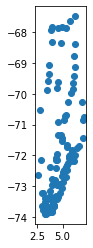

In [81]:
# Visualizando os pontos
fig, ax = plt.subplots()
# fig.set_size_inches(10, 15)
stations.plot(ax=ax)

In [64]:
import folium

In [65]:
# Abrindo o visualizador 
osm_map = folium.Map(location=[stations.Lat.mean(), stations.Long.mean()], zoom_start=7)
osm_map

In [66]:
points = folium.features.GeoJson(stations.to_json())

In [67]:
osm_map.add_child(points)
osm_map

Para reprojetar uma camada, a camada deve ter seu sistema de referência de coordenadas (SRC) definido, caso contrário não é possível fazer a reprojeção.

In [68]:
stations.crs
#se não tiver, criaremos um sistema de referencia
if stations.crs is None:
  stations = stations.set_crs('epsg:4326')
  stations.crs



In [69]:
stations_epsg3117 = stations.to_crs('EPSG:3117')
stations_epsg3117.crs

<Derived Projected CRS: EPSG:3117>
Name: MAGNA-SIRGAS / Colombia East Central zone
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Colombia - onshore between 1°30'E and 4°30'E of Bogota (72°35'W and 69°34'W of Greenwich).
- bounds: (-72.59, -4.23, -69.58, 12.52)
Coordinate Operation:
- name: Colombia MAGNA East Central zone
- method: Transverse Mercator
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Exportar um GeoDataFrame para formatos GIS comuns
Use o método to_file() de geopandas para gravar um GeoDataFrame em um arquivo em qualquer um dos mais de 20 formatos possíveis, incluindo GeoPackage, GeoJSON, GML, ESRI Shapefile e outros:

In [70]:
stations.to_file('teste_file.shp')

<ipython-input-70-bd500ed6edf3>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  stations.to_file('teste_file.shp')
